# 단순선형회귀 - 경사하강(Gradient Descent)

In [ ]:
import numpy as np
import random

import matplotlib.pyplot as plt

In [ ]:
def generate_data(n_samples, bias, variance):
    X = np.zeros(shape=(n_samples, 2)) #단순선형회귀(독립변수 1개)
    y = np.zeros(shape=n_samples)

    for i in range(n_samples):
        X[i][0] = 1 #x_0은 상수 1로 셋팅
        X[i][1] = i #x_1값은 1씩 증가시킴
        y[i] = (i+bias) + random.uniform(0, 1) * variance #y에 bias 생성

    return X, y

In [ ]:
X, y = generate_data(100, 25, 10) #n_samples:100, bias:25, variance:10

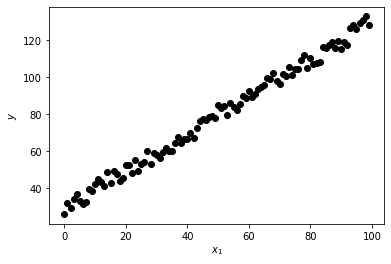

In [ ]:
plt.plot(X[:,1],y,"ko") #x_1과 y의 상관관계 그래프
plt.xlabel('$x_1$') #x축
plt.ylabel('$y$')   #y축
plt.show()

In [ ]:
def gradient_descent(X, y, theta, alpha, m, n_iter):
    theta_list = [] #회귀계수(파라미터)
    cost_list = []  #비용함수 값
    iter_list = []
    check_points = int(n_iter/20)

    for i in range(n_iter):
        hypothesis = np.dot(X, theta) #가설함수(X:mxn, theta:nx1, hypothesis:mx1)
        loss = hypothesis - y #error
        cost = np.sum(loss ** 2) / (2 * m) #비용함수: J(theta)
        gradient = np.dot(X.T, loss) / m #편미분
        theta = theta - alpha * gradient #theta update(theta:nx1)
        if i % check_points == 0:
            iter_list.append(i)
            theta_list.append(theta)
            cost_list.append(cost)
    return theta, np.array(theta_list), cost_list, iter_list

In [ ]:
m, n = np.shape(X) #m: n_sample, n: n_features
n_iter = 5000  #number of iterations
alpha = 0.0005 #learning rate
theta = np.ones(n) #parameter vector(nx1)

theta,theta_list,cost_list,iter_list = gradient_descent(X, y, theta, alpha, m, n_iter) 

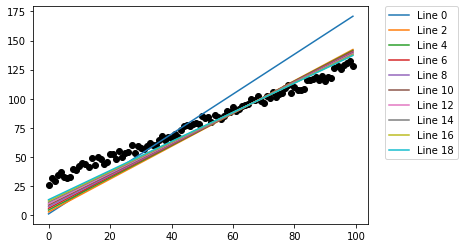

In [ ]:
y_predict_step = np.dot(X, theta_list.T) #y_hat:100x20, X:100x2, theta:20x2
plt.plot(X[:,1], y, "ko")
for i in range (0,y_predict_step.shape[1],2): #range(0,20,2)
    plt.plot(X[:,1],y_predict_step[:,i], label='Line %d'%i)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

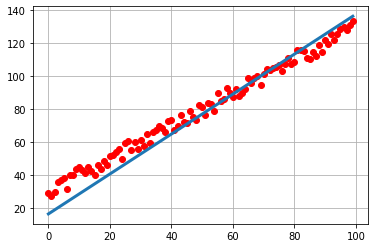

In [ ]:
y_predict= np.dot(X, theta) #theta_hat
plt.plot(X[:,1],y,"ro")
plt.plot(X[:,1],y_predict, lw=3)
plt.show()

In [ ]:
theta

array([16.6288939 ,  1.20922648])

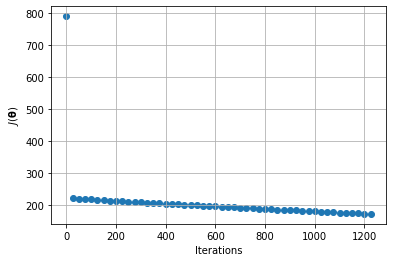

In [ ]:
plt.scatter(iter_list[:50], cost_list[:50])
plt.xlabel('Iterations')
plt.ylabel(r'$J(\mathbf{\theta})$') 
plt.show()